In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def cnnmodel():
    model = tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(224, 224, 3)), 
    
      tf.keras.layers.Conv2D(filters=8, kernel_size=11, strides=4, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    
      tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    
      tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),

      tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
    
      tf.keras.layers.Dense(2, activation="softmax") # binary activation output
    ], name="model_0")
    return model

In [12]:
random_state_global = 42
epoch_val = 1000
batch_size_val = 32
threshold_val = 1e-4
IMG_SIZE = (224, 224)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Define the paths for train and test data
train_dir =  'chest_xray/chest_xray/train'
test_dir =  'chest_xray/chest_xray/test'
val_dir =  'chest_xray/chest_xray/val'

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Split the training data into train and validation sets
train_generator = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=True)

train_ds = train_generator.map(lambda x, y: (normalization_layer(x), y))
print(train_ds)

test_generator = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle test data for prediction analysis
validation_generator = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle valid data for prediction analysis

class_names = validation_generator.class_names
print(f'\nclass names are {class_names}')

# Create an instance of the CNN model
model = cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
my_callbacks = [
            tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, min_delta=1e-4,mode="min",restore_best_weights=False,verbose=1)]
# Fit the model
history_1 = model.fit(train_ds,
                        epochs=epoch_val,
                        validation_data=validation_generator,
                        callbacks = my_callbacks,
                        verbose=0)

Found 5216 files belonging to 2 classes.
<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.

class names are ['NORMAL', 'PNEUMONIA']


C:\Users\SURINDER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8: early stopping


In [13]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.5223 - loss: 808.0689
Test loss: 429.8099060058594
Test accuracy: 0.7387820482254028


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator ,  batch_size=None, verbose="auto", callbacks=None)
print(test_loss)
print(test_accuracy)

val_loss, val_accuracy = model.evaluate(validation_generator ,  batch_size=None, verbose="auto", callbacks=None)
print(val_loss)
print(val_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.5223 - loss: 808.0689
429.8099060058594
0.7387820482254028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8750 - loss: 100.9557
100.95570373535156
0.875


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

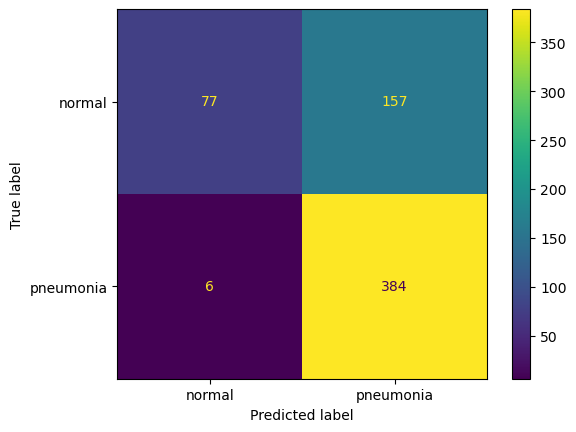

In [15]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred_test = model.predict(test_generator) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
flag = False 
for x , y in test_generator :
    if flag == False : 
       flag = True 
       sample_pic = x[1] 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = ["normal", "pneumonia"]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()